In [17]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28 , 28,1).astype("float32") / 255
x_test = x_test.reshape(10000, 28 , 28,1).astype("float32") / 255


In [5]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-25 17:38:00.051981: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10


2025-11-25 17:40:01.842433: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8816 - loss: 0.4041

2025-11-25 17:40:33.183451: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.9458 - loss: 0.1803 - val_accuracy: 0.9794 - val_loss: 0.0675
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9833 - loss: 0.0557 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9864 - val_loss: 0.0442
Epoch 4/10
166/750 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9920 - loss: 0.0303

KeyboardInterrupt: 

In [39]:
whichone = 210

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4


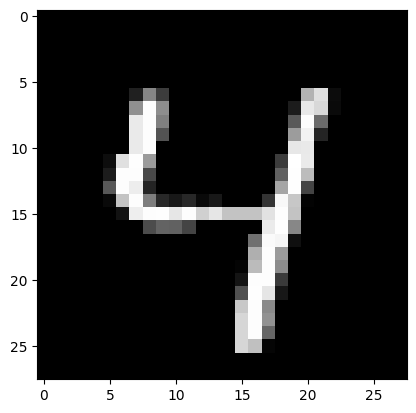

In [40]:
plt.imshow(x_test[whichone].reshape(28,28), cmap='gray')
print(np.argmax(model.predict(x_test[whichone:whichone+1])[0]))